In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud = pd.read_csv("Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud = fraud.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'})

In [5]:
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud['income_range'] = np.where(fraud['Taxable_Income']>=30000, 'Good', 'Risky')
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income_range
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [7]:
label_encoder = preprocessing.LabelEncoder()
fraud_data = fraud[['Undergrad', 'Marital_Status','Urban']].apply(label_encoder.fit_transform)
fraud_data = fraud_data.rename(columns={'Undergrad':'Undergrad_numeric', 'Marital_Status':'Marital_Status_numeric','Urban':'Urban_numeric'})

In [8]:
fraud_data.head()

,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,0,2,1
1,1,0,1
2,0,1,1
3,1,2,1
4,0,1,0


In [9]:
fraud_data = pd.concat([fraud,fraud_data], axis=1, sort=False)
fraud_data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income_range,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,NO,Single,68833,50047,10,YES,Good,0,2,1
1,YES,Divorced,33700,134075,18,YES,Good,1,0,1
2,NO,Married,36925,160205,30,YES,Good,0,1,1
3,YES,Single,50190,193264,15,YES,Good,1,2,1
4,NO,Married,81002,27533,28,NO,Good,0,1,0


In [10]:
fraud_data.drop(columns={'Undergrad','Marital_Status','Urban','Taxable_Income'},axis=1)

,City_Population,Work_Experience,income_range,Undergrad_numeric,Marital_Status_numeric,Urban_numeric
0,50047,10,Good,0,2,1
1,134075,18,Good,1,0,1
2,160205,30,Good,0,1,1
3,193264,15,Good,1,2,1
4,27533,28,Good,0,1,0
...,...,...,...,...,...,...
595,39492,7,Good,1,0,1
596,55369,2,Good,1,0,1
597,154058,0,Good,0,0,1
598,180083,17,Good,1,1,0


In [11]:
fraud_data = fraud_data[['City_Population','Work_Experience','Undergrad_numeric','Marital_Status_numeric','Urban_numeric','income_range']]

In [12]:
fraud_data.head()

,City_Population,Work_Experience,Undergrad_numeric,Marital_Status_numeric,Urban_numeric,income_range
0,50047,10,0,2,1,Good
1,134075,18,1,0,1,Good
2,160205,30,0,1,1,Good
3,193264,15,1,2,1,Good
4,27533,28,0,1,0,Good


In [13]:
colnames=list(fraud_data.columns)
colnames

['City_Population',
 'Work_Experience',
 'Undergrad_numeric',
 'Marital_Status_numeric',
 'Urban_numeric',
 'income_range']

In [14]:
fraud_data.income_range.value_counts()

Good     476
Risky    124
Name: income_range, dtype: int64

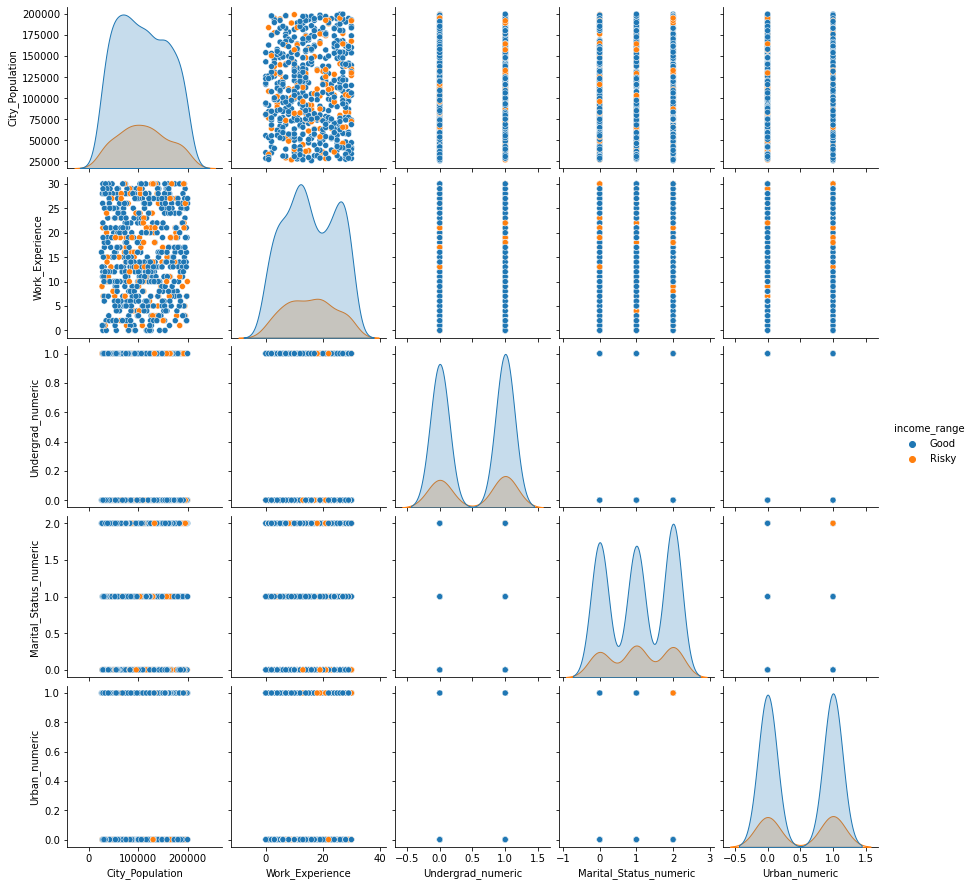

In [15]:
sns.pairplot(fraud_data,hue='income_range')

In [16]:
fraud_data.isnull().sum()

City_Population           0
Work_Experience           0
Undergrad_numeric         0
Marital_Status_numeric    0
Urban_numeric             0
income_range              0
dtype: int64

In [17]:
x=fraud_data.iloc[:,0:5]
y=fraud_data['income_range']

In [18]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [19]:
# Building Decision Tree Classifier using Entropy Criteria

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

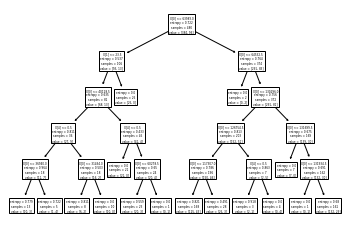

In [21]:
#PLot the decision tree
tree.plot_tree(model);

In [22]:
fn=['City_Population',
 'Work_Experience',
 'Undergrad_numeric',
 'Marital_Status_numeric',
 'Urban_numeric']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2.5,2.5), dpi=5000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Good     117
Risky      3
dtype: int64

In [24]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
   

In [25]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,Good,Risky
income_range,,
Good,91,1
Risky,26,2


In [26]:
np.mean(preds==y_test)

0.775

# Bagging

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
seed = 7

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)

In [29]:
model.fit(x_train, y_train);

In [30]:
confusion_matrix(y_test,model.predict(x_test))

array([[87,  5],
       [26,  2]], dtype=int64)

In [31]:
accuracy_score(y_test,model.predict(x_test))

0.7416666666666667

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
num_trees = 400
max_features = 4
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [34]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=400)

In [35]:
accuracy_score(y_test,model.predict(x_test))

0.7416666666666667

In [36]:
confusion_matrix(y_test,model.predict(x_test))

array([[88,  4],
       [27,  1]], dtype=int64)

# AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
num_trees = 30
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)

In [39]:
model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=30)

In [40]:
accuracy_score(y_test,model.predict(x_test))

0.7583333333333333

In [41]:
confusion_matrix(y_test,model.predict(x_test))

array([[91,  1],
       [28,  0]], dtype=int64)

# XG boost

In [42]:
!pip install xgboost

In [43]:
from xgboost import XGBClassifier

In [44]:
model = XGBClassifier()
model.fit(x_train, y_train)

C:\Users\aaa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
y_pred = model.predict(x_test)
predictions = [value for value in y_pred]

C:\Users\aaa\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [46]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.33%


In [47]:
predictions

['Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Risky',
 'Ris